# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

# Indice <a name = "Voltar"></a>

1. [Importando os pacotes](#1)
2. [Importando a base de dados](#2)
3. [Exercicio 1](#3)


# <font color = "Green"> **1 Importando os pacotes**  <a name = "1"></a>
    
[Voltar](#Voltar)    

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

np.random.seed(2360803)
N=100

# <font color = "Green"> **2 Importando a base de dados**  <a name = "2"></a>
    
[Voltar](#Voltar)    

In [4]:
base = pd.read_csv(r"C:\Users\Positivo\Desktop\Cursos\Curso Ciencias de dados Ebac\Ciencias de dados\Modulo10descritiva2\Aula1\Profissao- Cientista de Dados_M10_support material.csv")
base.head(5)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [5]:
base2 = base.drop("Unnamed: 0", axis=1)
base2.tail()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39
14999,2016-03-01,12895,F,True,True,0,Assalariado,Secundário,Casado,Casa,50,3.049315,2.0,False,993.86


# <font color = "Green"> **3 Exercicio 1**  <a name = "3"></a>
    
[Voltar](#Voltar)    

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

- Realmete quem tem posse de imovel ou veiculo tem uma renda maior

<AxesSubplot:xlabel='posse_de_imovel', ylabel='renda'>

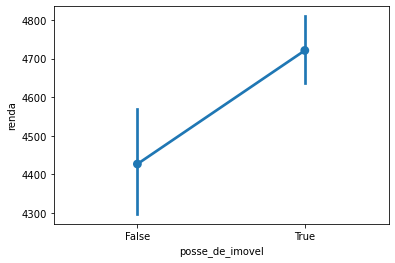

In [11]:
sns.pointplot(x="posse_de_imovel",y="renda",data=base2)

<AxesSubplot:xlabel='posse_de_imovel', ylabel='renda'>

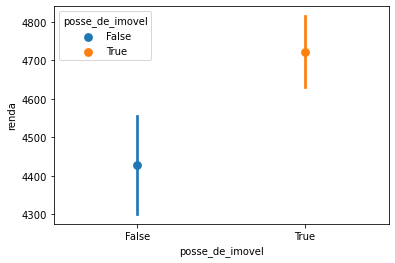

In [10]:
sns.pointplot(x="posse_de_imovel",y="renda",data=base2, hue="posse_de_imovel")

<AxesSubplot:xlabel='posse_de_veiculo', ylabel='renda'>

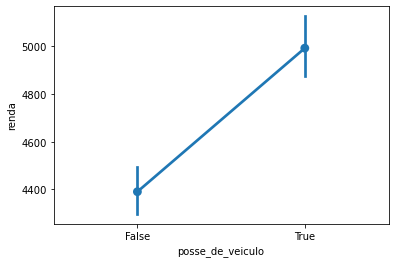

In [12]:
sns.pointplot(x="posse_de_veiculo",y="renda",data=base2)

In [37]:
print("A media de Salarios de pessoas que tem imovel é R$:{}".format(round(base2[base["posse_de_imovel"]==True]["renda"].mean(),2)))

A media de Salarios de pessoas que tem imovel é R$:4721.05


In [36]:
print("A media de salarios de pessoas que não tem imoveis é de R$ {}".format(round(base2[base["posse_de_imovel"]==False]["renda"].mean(),2)))

A media de salarios de pessoas que não tem imoveis é de R$ 4426.97


In [15]:
base2[base["posse_de_imovel"]==True].groupby(["tipo_residencia"])[["renda"]].mean()

,renda
tipo_residencia,
Aluguel,5620.205221
Casa,4730.735799
Com os pais,3956.178350
Comunitário,4797.525758
Estúdio,5436.338679
Governamental,4182.228874


<AxesSubplot:xlabel='tipo_residencia'>

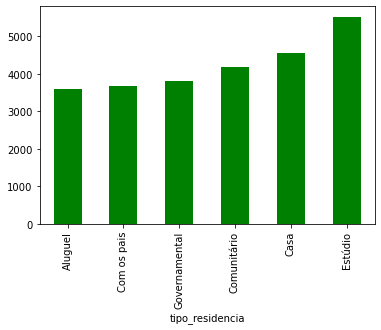

In [25]:
base2[base["posse_de_imovel"]==False].groupby(["tipo_residencia"])["renda"].mean().sort_values().plot.bar(color="Green")

<AxesSubplot:xlabel='Log_salario', ylabel='idade'>

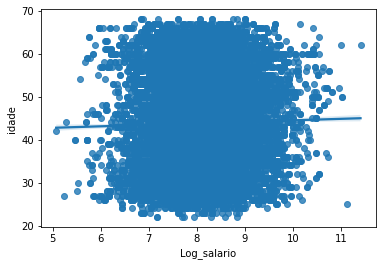

In [43]:
base3 = base2.copy()
base3["Log_salario"] = np.log(base3["renda"])
sns.regplot(x="Log_salario",y="idade",data=base3)

In [39]:
base2.tail(2)

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39
14999,2016-03-01,12895,F,True,True,0,Assalariado,Secundário,Casado,Casa,50,3.049315,2.0,False,993.86


In [ ]:
df4_log = df4.copy()
df4_log['log_y'] = np.log(df4_log['y'])

_ = sns.regplot(x='x', y='log_y', data = df4_log)